<a href="https://colab.research.google.com/github/luizfreire96/Rent-web-scraping/blob/main/Calculadora_de_aluguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

#Preprocessing the data

In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/Awari/Calculadora de aluguel/out.csv')

In [ ]:
df_raw.head()

,"['26m²', 'Não informado SOLICITAR', '1 banheiro', '1 vaga', 'Avenida Ministro José Américo, 326 - Parque Iracema, Fortaleza - CE', 'R$ 1.000/mês']"
0,"['35m²', 'Não informado SOLICITAR', '1 banheir..."
1,"['300m²', 'Não informado SOLICITAR', '7 banhei..."
2,"['140m²', '3 quartos', '3 banheiros\n3 suítes'..."
3,"['15m²', 'Não informado SOLICITAR', '4 banheir..."
4,"['504m²', 'Não informado SOLICITAR', 'Não info..."


In [ ]:
df = df_raw.iloc[:, 0].str.split(',', expand=True)

In [ ]:
df.sample(5)

,0,1,2,3,4,5,6,7
4699,['280m²','5 quartos','3 banheiros\n2 suítes','3 vagas','Rua Azevedo Bolão,1020 - Parquelândia,Fortaleza - CE','R$ 3.300/mês']
3570,['97m²','2 quartos','2 banheiros\n1 suíte','4 vagas','Rua Capitão Gutemberg,950 - Cidade dos Funcionários,Fortaleza - CE','R$ 1.250/mês']
2385,['35m²','Não informado SOLICITAR','1 banheiro','Não informado SOLICITAR','Avenida Dom Luís,1200 - Meireles,Fortaleza - CE','R$ 2.500/mês']
2417,['76m²','2 quartos','2 banheiros\n2 suítes','1 vaga','Rua Tomás Pompeu,550 - Meireles,Fortaleza - CE','R$ 5.800/mês']
1692,['39m²','1 quarto','1 banheiro\n1 suíte','1 vaga','Avenida da Abolição - Meireles,Fortaleza - CE','R$ 2.000/mês'],None


In [ ]:
df.rename(columns = {0:'Tamanho', 1:'Quartos', 2:'Banheiros', 3:'Vagas', 4:'Rua', 5:'Numero e Bairro', 6: 'Cidade', 7:'Aluguel'}, inplace = True)

In [ ]:
df.sample(5)

,Tamanho,Quartos,Banheiros,Vagas,Rua,Numero e Bairro,Cidade,Aluguel
2170,['45m²','5 quartos','5 banheiros\n36 suítes','36 vagas','Rua Jaguaretama,88 - Aldeota,Fortaleza - CE','R$ 1.300/mês']
3936,['30m²','Não informado SOLICITAR','Não informado SOLICITAR','Não informado SOLICITAR','Rua Carolina Sucupira,1264 - Aldeota,Fortaleza - CE','R$ 500/mês']
4258,['33m²','Não informado SOLICITAR','1 banheiro','1 vaga','Rua Monsenhor Bruno,1153 - Aldeota,Fortaleza - CE','R$ 1.750/mês']
475,['67m²','2 quartos','2 banheiros\n1 suíte','2 vagas','Rua Nunes Valente,1978 - Meireles,Fortaleza - CE','R$ 1.950/mês']
2162,['33m²','Não informado SOLICITAR','1 banheiro','1 vaga','Rua Monsenhor Bruno,1153 - Aldeota,Fortaleza - CE','R$ 1.750/mês']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5299 entries, 0 to 5298
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tamanho          5299 non-null   object
 1   Quartos          5299 non-null   object
 2   Banheiros        5299 non-null   object
 3   Vagas            5299 non-null   object
 4   Rua              5299 non-null   object
 5   Numero e Bairro  5299 non-null   object
 6   Cidade           5299 non-null   object
 7   Aluguel          4730 non-null   object
dtypes: object(8)
memory usage: 331.3+ KB


In [ ]:
df.isna().sum()

Tamanho              0
Quartos              0
Banheiros            0
Vagas                0
Rua                  0
Numero e Bairro      0
Cidade               0
Aluguel            569
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4730 entries, 0 to 5298
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tamanho          4730 non-null   object
 1   Quartos          4730 non-null   object
 2   Banheiros        4730 non-null   object
 3   Vagas            4730 non-null   object
 4   Rua              4730 non-null   object
 5   Numero e Bairro  4730 non-null   object
 6   Cidade           4730 non-null   object
 7   Aluguel          4730 non-null   object
dtypes: object(8)
memory usage: 332.6+ KB


In [ ]:
for i in range(len(df['Tamanho'])):
  df['Tamanho'].iloc[i] = re.sub("[^0-9]", '', df['Tamanho'].iloc[i])

for i in range(len(df['Quartos'])):
  df['Quartos'].iloc[i] = re.sub("[^0-9]", '', df['Quartos'].iloc[i])

for i in range(len(df['Aluguel'])):
  df['Aluguel'].iloc[i] = re.sub("[^0-9]", '', df['Aluguel'].iloc[i])

for i in range(len(df['Vagas'])):
  df['Vagas'].iloc[i] = re.sub("[^0-9]", '', df['Vagas'].iloc[i])



In [ ]:
df.sample(5)

,Tamanho,Quartos,Banheiros,Vagas,Rua,Numero e Bairro,Cidade,Aluguel
4714,140,3,'3 banheiros\n3 suítes',1,'Rua Barbosa de Freitas,1111 - Aldeota,Fortaleza - CE',3000
3294,70,2,'2 banheiros\n1 suíte',1,'Avenida Historiador Raimundo Girão,630 - Meireles,Fortaleza - CE',2400
998,35,1,'1 banheiro',1,'Avenida Beira Mar,3470 - Mucuripe,Fortaleza - CE',4428
2455,140,3,'3 banheiros\n3 suítes',1,'Rua Barbosa de Freitas,1111 - Aldeota,Fortaleza - CE',3000
860,120,3,'3 banheiros\n1 suíte',2,'Rua Tereza Hinko,50 - Mucuripe,Fortaleza - CE',500


In [ ]:
df['Bairro'] = df['Numero e Bairro'].str.split('-', expand=True)[1]

In [ ]:
df.sample(5)

,Tamanho,Quartos,Banheiros,Vagas,Rua,Numero e Bairro,Cidade,Aluguel,Bairro
4731,253,4,'6 banheiros\n4 suítes',4,'Avenida Beira Mar,2100 - Meireles,Fortaleza - CE',13000,Meireles
4806,86,3,'2 banheiros\n1 suíte',1,'Rua Hermínia Bonavides,271 - Vicente Pinzon,Fortaleza - CE',1200,Vicente Pinzon
1314,68,3,'2 banheiros\n1 suíte',1,'Avenida Godofredo Maciel,858 - Parangaba,Fortaleza - CE',800,Parangaba
4733,68,3,'2 banheiros\n2 suítes',2,'Rua Deusdedit Costa Sousa,55 - Cocó,Fortaleza - CE',2200,Cocó
300,7,4,'1 banheiro',1,'Rua Vicente Linhares,500 - Aldeota,Fortaleza - CE',200,Aldeota


In [ ]:
for i in range(len(df['Numero e Bairro'])):
  df['Numero e Bairro'].iloc[i] = re.sub("[^0-9]", '', df['Numero e Bairro'].iloc[i])
df = df.rename(columns = {'Numero e Bairro':'Numero'})

In [ ]:
df.sample(5)

,Tamanho,Quartos,Banheiros,Vagas,Rua,Numero,Cidade,Aluguel,Bairro
3467,45,2,'1 banheiro',,'Rua Senador Alencar,909,Fortaleza - CE',880,Centro
2152,300,,'7 banheiros',,'Avenida Doutor Silas Munguba,6070,Fortaleza - CE',6000,Passaré
2488,300,,'7 banheiros',,'Avenida Doutor Silas Munguba,6070,Fortaleza - CE',6000,Passaré
850,140,3,'3 banheiros\n3 suítes',1,'Rua Barbosa de Freitas,1111,Fortaleza - CE',3000,Aldeota
4472,40,1,'1 banheiro\n1 suíte',1,'Rua Joaquim Nabuco,166,Fortaleza - CE',3500,Meireles


In [ ]:
df['Banheiros'], df['Suites'] = df['Banheiros'].str.split("b", expand=True)[0], df['Banheiros'].str.split("b", expand=True)[1]

In [ ]:
df.sample(5)

,Tamanho,Quartos,Banheiros,Vagas,Rua,Numero,Cidade,Aluguel,Bairro,Suites
2178,100,3,'3,,'Rua José Ivo,316,Fortaleza - CE',1600,Messejana,anheiros\n2 suítes'
2437,45,1,'1,1,'Rua Dom Joaquim,284,Fortaleza - CE',1200,Praia de Iracema,anheiro\n1 suíte'
174,35,,'1,,'Avenida Dom Luís,1200,Fortaleza - CE',2500,Meireles,anheiro'
3927,33,,'1,1,'Rua Monsenhor Bruno,1153,Fortaleza - CE',1750,Aldeota,anheiro'
3870,70,2,'2,1,'Avenida Historiador Raimundo Girão,630,Fortaleza - CE',2400,Meireles,anheiros\n1 suíte'


In [ ]:
df['Banheiros'] = df['Banheiros'].fillna('0')
df['Suites'] = df['Suites'].fillna('0')

In [ ]:
for i in range(len(df['Banheiros'])):
  df['Banheiros'].iloc[i] = re.sub("[^0-9]", '', df['Banheiros'].iloc[i])

for i in range(len(df['Suites'])):
  df['Suites'].iloc[i] = re.sub("[^0-9]", '', df['Suites'].iloc[i])

In [ ]:
df.sample(5)

,Tamanho,Quartos,Banheiros,Vagas,Rua,Numero,Cidade,Aluguel,Bairro,Suites
2064,97,2,2,4,'Rua Capitão Gutemberg,950,Fortaleza - CE',1250,Cidade dos Funcionários,1
4968,45,2,1,,'Rua Senador Alencar,909,Fortaleza - CE',880,Centro,
445,26,,1,1,'Avenida Ministro José Américo,326,Fortaleza - CE',1000,Parque Iracema,
4203,113,,4,,'Avenida Santos Dumont,2828,Fortaleza - CE',5500,Aldeota,
2503,45,1,1,1,'Rua Dom Joaquim,284,Fortaleza - CE',1200,Praia de Iracema,1


O Bairro pode ter uma alta correlação com o valor do aluguel, mas no momento de fazer a regressão, talvez seja inviável treinar um modelo para cada bairro, portanto vamos dividir em faixas de preço por metro quadrado

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4730 entries, 0 to 5298
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tamanho    4730 non-null   object
 1   Quartos    4730 non-null   object
 2   Banheiros  4730 non-null   object
 3   Vagas      4730 non-null   object
 4   Rua        4730 non-null   object
 5   Numero     4730 non-null   object
 6   Cidade     4730 non-null   object
 7   Aluguel    4730 non-null   object
 8   Bairro     4730 non-null   object
 9   Suites     4730 non-null   object
dtypes: object(10)
memory usage: 406.5+ KB


In [ ]:
df.isnull().sum()

Tamanho      0
Quartos      0
Banheiros    0
Vagas        0
Rua          0
Numero       0
Cidade       0
Aluguel      0
Bairro       0
Suites       0
dtype: int64

In [ ]:
df = df.replace(r'^\s*$', np.NaN, regex=True)
df = df.fillna(0)

In [ ]:
df['Aluguel']= df['Aluguel'].astype(float)
df['Tamanho']= df['Tamanho'].astype(float)
df['Quartos']= df['Quartos'].astype(float)
df['Banheiros']= df['Banheiros'].astype(float)
df['Suites']= df['Suites'].astype(float)
df['Vagas']= df['Vagas'].astype(float)

In [ ]:
df.sample(5)

,Tamanho,Quartos,Banheiros,Vagas,Rua,Numero,Cidade,Aluguel,Bairro,Suites
5011,70.0,2.0,2.0,1.0,'Avenida Historiador Raimundo Girão,630,Fortaleza - CE',2400.0,Meireles,1.0
5272,86.0,3.0,2.0,1.0,'Rua Hermínia Bonavides,271,Fortaleza - CE',1200.0,Vicente Pinzon,1.0
3701,0.0,0.0,0.0,0.0,'Avenida Santos Dumont,6740,Fortaleza - CE',1200.0,Cocó,0.0
1375,97.0,2.0,2.0,4.0,'Rua Capitão Gutemberg,950,Fortaleza - CE',1250.0,Cidade dos Funcionários,1.0
3606,97.0,2.0,2.0,4.0,'Rua Capitão Gutemberg,950,Fortaleza - CE',1250.0,Cidade dos Funcionários,1.0


In [ ]:
df['Preco por m2'] = df['Aluguel']/df['Tamanho']

In [ ]:
df.sample(5)

,Tamanho,Quartos,Banheiros,Vagas,Rua,Numero,Cidade,Aluguel,Bairro,Suites,Preco por m2
5084,145.0,3.0,3.0,2.0,'Rua Osvaldo Cruz,241,Fortaleza - CE',5000.0,Meireles,2.0,34.482759
2586,26.0,0.0,1.0,1.0,'Avenida Ministro José Américo,326,Fortaleza - CE',1000.0,Parque Iracema,0.0,38.461538
4505,86.0,3.0,2.0,1.0,'Rua Hermínia Bonavides,271,Fortaleza - CE',1200.0,Vicente Pinzon,1.0,13.953488
1408,42.0,1.0,1.0,1.0,'Avenida Beira Mar,3470,Fortaleza - CE',2000.0,Mucuripe,1.0,47.619048
1280,19.0,0.0,2.0,4.0,'Rua Osvaldo Cruz,2860,Fortaleza - CE',1260.0,Dionísio Torres,0.0,66.315789


In [ ]:
df.shape

(4730, 11)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(78, 11)

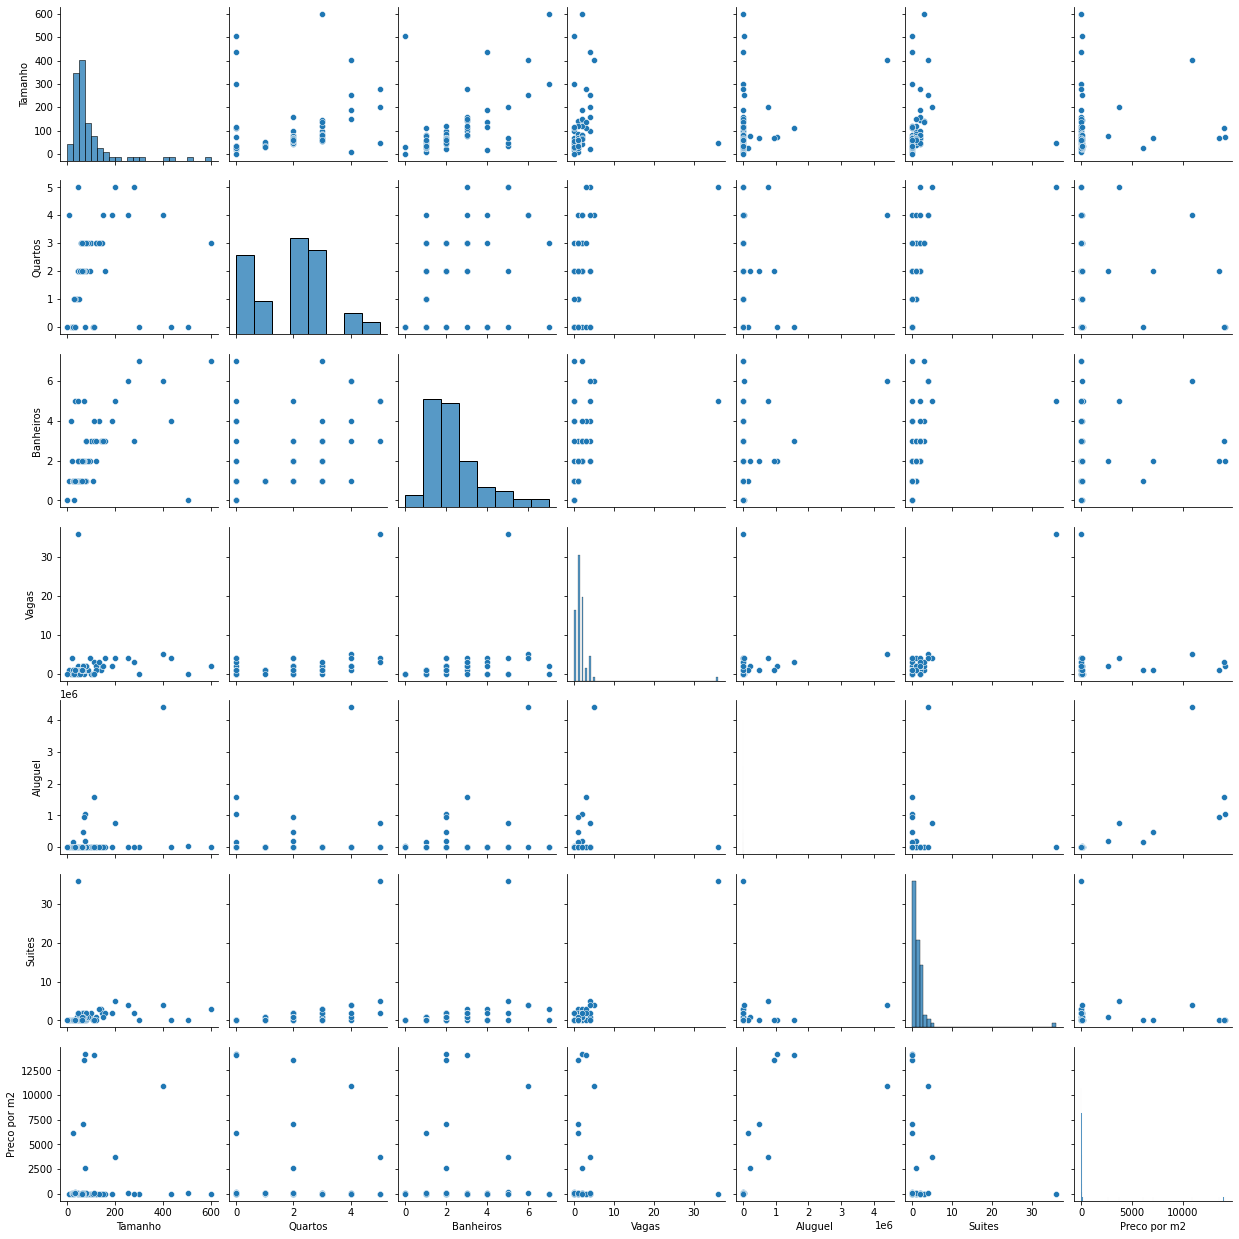

In [ ]:
sns.pairplot(df)

In [ ]:
df = df[df['Preco por m2'] < 40]

In [ ]:
fig = make_subplots(
    rows=4, cols=2,
    specs=[[{"colspan": 2}, None],
           [{}, {}],
           [{}, {}],
           [{}, {}]])

fig.add_trace(
    go.Box(x=df['Aluguel'],
    name='Aluguel'),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=df['Tamanho'],
    name='Tamanho'),
    row=2, col=1
)

fig.add_trace(
    go.Box(x=df['Quartos'],
    name='Quartos'),
    row=2, col=2
)

fig.add_trace(
    go.Box(x=df['Banheiros'],
    name='Banheiros'),
    row=3, col=1
)

fig.add_trace(
    go.Box(x=df['Suites'],
    name='Suites'),
    row=3, col=2
)

fig.add_trace(
    go.Box(x=df['Vagas'],
    name='Vagas'),
    row=4, col=1
)

fig.add_trace(
    go.Box(x=df['Preco por m2'],
    name='Preco por m2'),
    row=4, col=2
)

fig.show()

In [ ]:
df = df[df['Suites'] < 35]

In [ ]:
fig = make_subplots(
    rows=4, cols=2,
    specs=[[{"colspan": 2}, None],
           [{}, {}],
           [{}, {}],
           [{}, {}]])

fig.add_trace(
    go.Box(x=df['Aluguel'],
    name='Aluguel'),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=df['Tamanho'],
    name='Tamanho'),
    row=2, col=1
)

fig.add_trace(
    go.Box(x=df['Quartos'],
    name='Quartos'),
    row=2, col=2
)

fig.add_trace(
    go.Box(x=df['Banheiros'],
    name='Banheiros'),
    row=3, col=1
)

fig.add_trace(
    go.Box(x=df['Suites'],
    name='Suites'),
    row=3, col=2
)

fig.add_trace(
    go.Box(x=df['Vagas'],
    name='Vagas'),
    row=4, col=1
)

fig.add_trace(
    go.Box(x=df['Preco por m2'],
    name='Preco por m2'),
    row=4, col=2
)

fig.show()

In [ ]:
df = df[df['Tamanho']< 250]

In [ ]:
fig = make_subplots(
    rows=4, cols=2,
    specs=[[{"colspan": 2}, None],
           [{}, {}],
           [{}, {}],
           [{}, {}]])

fig.add_trace(
    go.Box(x=df['Aluguel'],
    name='Aluguel'),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=df['Tamanho'],
    name='Tamanho'),
    row=2, col=1
)

fig.add_trace(
    go.Box(x=df['Quartos'],
    name='Quartos'),
    row=2, col=2
)

fig.add_trace(
    go.Box(x=df['Banheiros'],
    name='Banheiros'),
    row=3, col=1
)

fig.add_trace(
    go.Box(x=df['Suites'],
    name='Suites'),
    row=3, col=2
)

fig.add_trace(
    go.Box(x=df['Vagas'],
    name='Vagas'),
    row=4, col=1
)

fig.add_trace(
    go.Box(x=df['Preco por m2'],
    name='Preco por m2'),
    row=4, col=2
)

fig.show()

In [ ]:
bins = np.linspace(3.5, 40, 11)
labels = range(1,11)
df['Regiao'] = pd.cut(df['Preco por m2'], bins, labels=labels)

In [ ]:
df.sample(5)

,Tamanho,Quartos,Banheiros,Vagas,Rua,Numero,Cidade,Aluguel,Bairro,Suites,Preco por m2,Regiao
252,81.0,3.0,3.0,2.0,'Avenida Sargento Hermínio Sampaio,1823,Fortaleza - CE',2300.0,Sao Gerardo,2.0,28.395062,7
254,47.0,2.0,2.0,0.0,'Avenida Beira Mar,2450,Fortaleza - CE',450.0,Mucuripe,2.0,9.574468,2
431,68.0,3.0,2.0,1.0,'Avenida Godofredo Maciel,858,Fortaleza - CE',800.0,Parangaba,1.0,11.764706,3
21,70.0,2.0,2.0,1.0,'Avenida Historiador Raimundo Girão,630,Fortaleza - CE',2400.0,Meireles,1.0,34.285714,9
335,150.0,4.0,3.0,2.0,'Rua Euclides Onofre de Souza,390,Fortaleza - CE',1950.0,Sapiranga,1.0,13.000000,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 2 to 5134
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Tamanho       45 non-null     float64 
 1   Quartos       45 non-null     float64 
 2   Banheiros     45 non-null     float64 
 3   Vagas         45 non-null     float64 
 4   Rua           45 non-null     object  
 5   Numero        45 non-null     object  
 6   Cidade        45 non-null     object  
 7   Aluguel       45 non-null     float64 
 8   Bairro        45 non-null     object  
 9   Suites        45 non-null     float64 
 10  Preco por m2  45 non-null     float64 
 11  Regiao        45 non-null     category
dtypes: category(1), float64(7), object(4)
memory usage: 4.4+ KB


In [ ]:
px.imshow(df.corr().round(2), text_auto=True)

In [ ]:
correlacoes_zona = []
for i in labels:
  correlacoes_zona.append(df[df['Regiao'] == i].corr())

In [ ]:
fig = px.imshow(correlacoes_zona[7].round(2), text_auto=True)
fig.show()

In [ ]:
df[df['Regiao'] == 7]

,Tamanho,Quartos,Banheiros,Vagas,Rua,Numero,Cidade,Aluguel,Bairro,Suites,Preco por m2,Regiao
12,7.0,4.0,1.0,1.0,'Rua Vicente Linhares,500,Fortaleza - CE',200.0,Aldeota,0.0,28.571429,7
23,45.0,1.0,1.0,1.0,'Rua Dom Joaquim,284,Fortaleza - CE',1200.0,Praia de Iracema,1.0,26.666667,7
31,70.0,2.0,5.0,0.0,'Rua Arquiteto Reginaldo Rangel,155,Fortaleza - CE',1900.0,Cocó,2.0,27.142857,7
34,159.0,2.0,3.0,4.0,'Rua Silva Jatahy,90,Fortaleza - CE',4500.0,Meireles,2.0,28.301887,7
225,65.0,3.0,2.0,2.0,'Avenida Prudente Brasil,192,Fortaleza - CE',1700.0,Passaré,1.0,26.153846,7
252,81.0,3.0,3.0,2.0,'Avenida Sargento Hermínio Sampaio,1823,Fortaleza - CE',2300.0,Sao Gerardo,2.0,28.395062,7
4240,26.0,0.0,1.0,0.0,'Avenida Santos Dumont,1699,Fortaleza - CE',700.0,Aldeota,0.0,26.923077,7


In [ ]:
df.shape

(45, 12)

df.info()